In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
var = pd.read_csv('mask_test_counting_new.csv')
var.head()

,Sample #,Start Date,Start Time,Sample Length,Averaging Interval (s),Title,Instrument ID,Instrument Errors,Conc Mean,Conc Min,Conc Max,Conc Std Dev
0,1,4/15/22,13:25:25,10,2,NaN,3775 71025228 2.16,None,72.561,44.965,107.720,24.31870
1,2,4/15/22,13:25:36,10,2,NaN,3775 71025228 2.16,None,113.282,91.925,121.665,10.82570
2,3,4/15/22,13:25:47,10,2,NaN,3775 71025228 2.16,None,100.585,86.465,109.625,9.33099
3,4,4/15/22,13:25:58,10,2,NaN,3775 71025228 2.16,None,92.335,88.225,97.260,3.91562
4,5,4/15/22,13:26:09,10,2,NaN,3775 71025228 2.16,None,106.576,84.890,122.325,12.82610


/var/folders/qf/r_bx8wf14lx6m_jgptyp_vmr0000gq/T/ipykernel_1432/1586684968.py:9: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(nbins=10, axis='x')


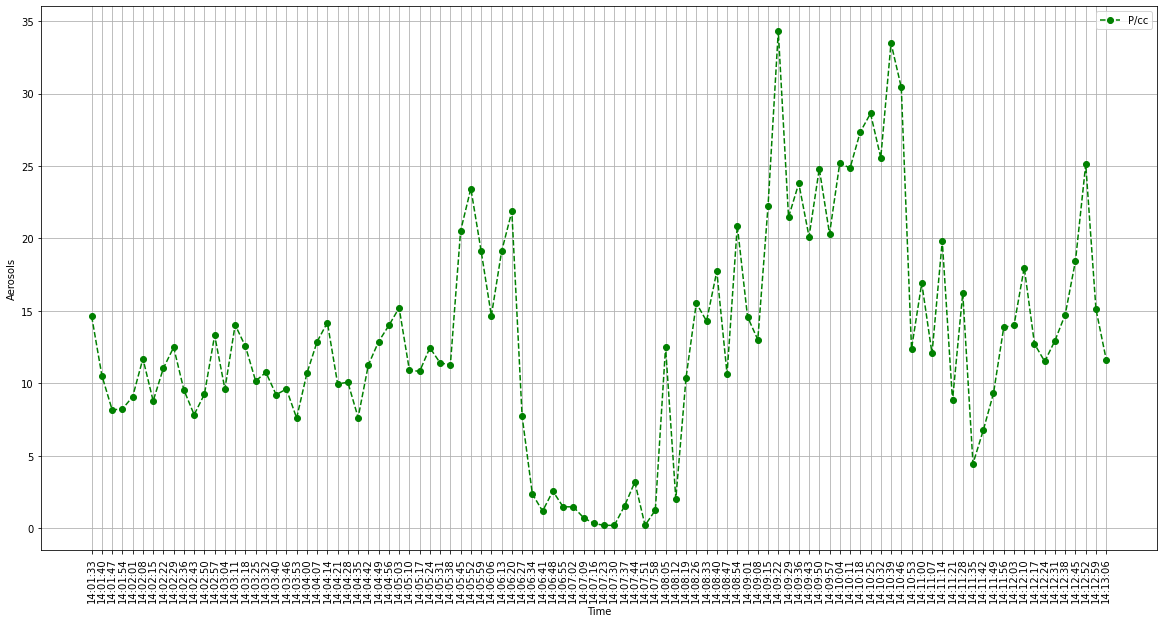

In [3]:
x = var['Start Time'][300:400]
y = var['Conc Mean'][300:400]

plt.figure(figsize=(20,10))
plt.plot(x, y , color = 'g', linestyle = 'dashed',
         marker = 'o',label = "P/cc")


plt.locator_params(nbins=10, axis='x')
plt.xticks(rotation = 90)
plt.xlabel('Time')
plt.ylabel('Aerosols')

plt.grid()
plt.legend()
plt.show()

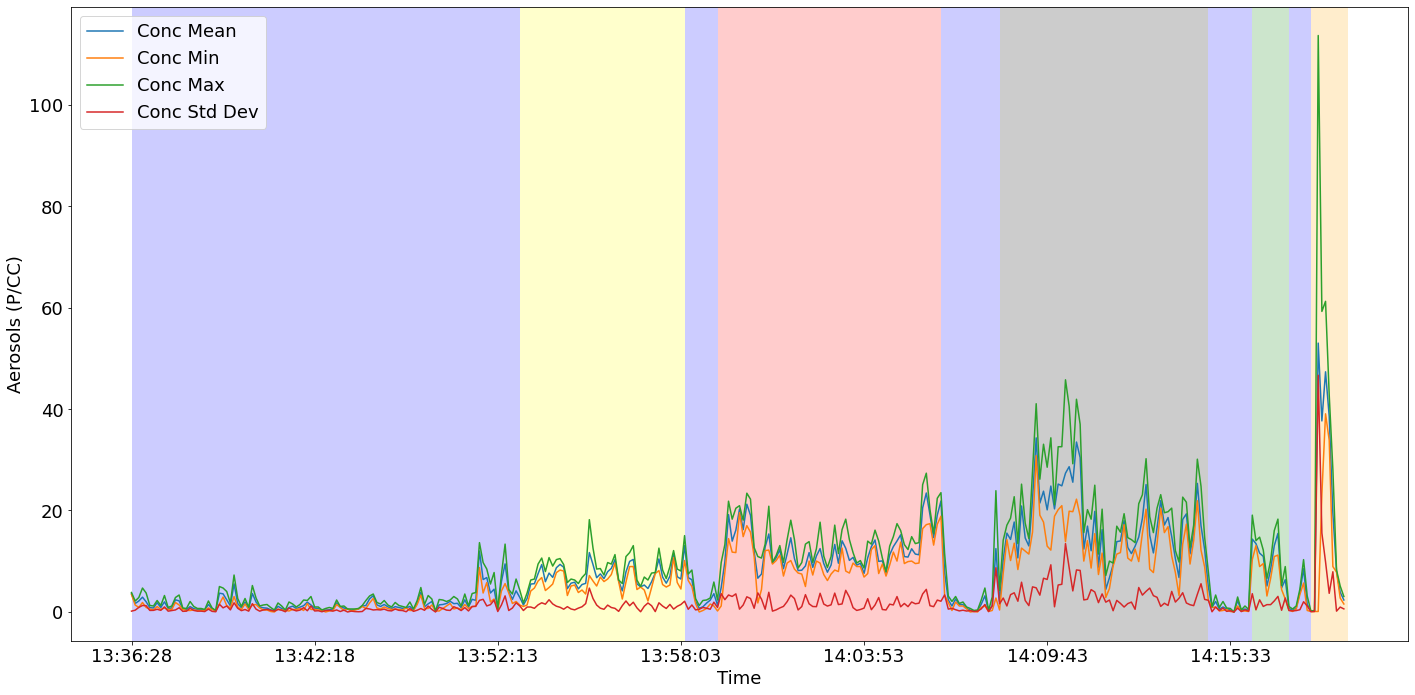

In [4]:
df = var[85:]
df = df.drop('Sample #', 1)
df = df.drop('Sample Length', 1)
df = df.drop('Averaging Interval (s)', 1)
df = df.drop('Title', 1)
df = df[:-12]
# df.drop(df[(df['Start Time'] <= "13:48") & ( df['Start Time'] >= "13:52")].index, inplace = True)
df = df.drop(df.index[(df['Start Time'] > "13:48") & ( df['Start Time'] < "13:52")])
# df = df[(df['Start Time'] <= "13:48") & ( df['Start Time'] >= "13:52")]
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 18})
df.set_index('Start Time').plot()
plt.ylabel('Aerosols (P/CC)')
plt.xlabel('Time')

plt.axvspan(0, 106 , color='blue', alpha=0.2, lw=0)
plt.axvspan(106, 151 , color='yellow', alpha=0.2, lw=0)
plt.axvspan(151, 160 , color='blue', alpha=0.2, lw=0)
plt.axvspan(160, 221 , color='red', alpha=0.2, lw=0)
plt.axvspan(221, 237 , color='blue', alpha=0.2, lw=0)
plt.axvspan(237, 294 , color='black', alpha=0.2, lw=0)
plt.axvspan(294, 306 , color='blue', alpha=0.2, lw=0)
plt.axvspan(306, 316 , color='green', alpha=0.2, lw=0)
plt.axvspan(316, 322 , color='blue', alpha=0.2, lw=0)
plt.axvspan(322, 332 , color='orange', alpha=0.2, lw=0)


plt.savefig('aerosol_activities_graph.jpg')

In [5]:
df[322:]

,Start Date,Start Time,Instrument ID,Instrument Errors,Conc Mean,Conc Min,Conc Max,Conc Std Dev
442,4/15/22,14:18:07,3775 71025228 2.16,None,0.164167,0.0985,0.1970,0.046433
443,4/15/22,14:18:14,3775 71025228 2.16,None,0.229833,0.0985,0.2955,0.092867
444,4/15/22,14:18:21,3775 71025228 2.16,None,52.992800,0.0985,113.6150,46.664000
445,4/15/22,14:18:28,3775 71025228 2.16,None,37.655000,23.2200,59.2350,15.546900
446,4/15/22,14:18:35,3775 71025228 2.16,None,47.335000,39.0550,61.2200,9.878730
447,4/15/22,14:18:43,3775 71025228 2.16,None,38.573300,33.8500,42.8150,3.675760
448,4/15/22,14:18:49,3775 71025228 2.16,None,19.408700,8.9475,28.1350,7.928740
449,4/15/22,14:18:56,3775 71025228 2.16,None,8.032170,7.8685,8.2605,0.166438
450,4/15/22,14:19:03,3775 71025228 2.16,None,3.901000,2.7540,5.1140,0.964596
451,4/15/22,14:19:10,3775 71025228 2.16,None,2.360500,1.5745,3.0485,0.605735


In [6]:
## Average aerosol comcentration for quiet/ breathing

l_quiet = df['Conc Max'][0:106].tolist()
# print(l_quiet)
print ("Beathing: ", sum(l_quiet)/len(l_quiet))

Beathing:  2.512990566037735


In [7]:
## Average aerosol comcentration for speaking normally

l_sl = df['Conc Max'][106:151].tolist()
# print(l_sl)

print ("Normal reading: ", sum(l_sl)/len(l_sl))



## Average aerosol comcentration for speaking loudly

l_sh = df['Conc Max'][160:221].tolist()

print ("loud reading", sum(l_sh)/len(l_sh))


Normal reading:  8.384111111111109
loud reading 14.40431967213115


In [8]:
## Average aerosol comcentration for singing

l_sing = df['Conc Max'][237:294].tolist()

# print(l_sing)

print ("Singing: ", sum(l_sing)/len(l_sing))

Singing:  21.5633947368421


In [9]:
## Average aerosol comcentration for coughing

l_cough = df['Conc Max'][306:316].tolist()

print (sum(l_cough)/len(l_cough))

12.529999999999998


In [10]:
## Average aerosol comcentration for sneezing

l_sneeze = df['Conc Max'][322:332].tolist()

print (sum(l_sneeze)/len(l_sneeze))

32.193549999999995


In [13]:
import matplotlib.pyplot as plot

from scipy.io import wavfile

import statistics 
import scipy.io.wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.signal as sps
import math
import os

from Signal_Analysis.features import signal



# Read the wav file (mono)
def wav_plot(filename):
    WAV_FILE_NAME  = filename
    samplingFrequency, signalData = wavfile.read(WAV_FILE_NAME)
    
    times = np.arange(len(signalData))/samplingFrequency
    print (len(times), times[-1])

    
    print(samplingFrequency)
    numchunks = 10
    chunks = np.array_split(signalData, numchunks)
    dbs = [20*math.log10( math.sqrt(statistics.mean(chunk**2)) ) for chunk in chunks]
    print ("average power", dbs)
    
    
    plt.figure(figsize=(20,7))

    # Plot the signal read from wav file

    plot.subplot(311)

    plot.title('Spectrogram of a wav file with air')



    plot.plot(times,signalData)

    plot.xlabel('Sample')

    plot.ylabel('Amplitude')



    plot.subplot(312)

    plot.specgram(signalData,Fs=samplingFrequency)

    plot.xlabel('Time')

    plot.ylabel('Frequency')
    

    plot.show()
    
    return samplingFrequency, signalData, times[-1]

For 4-15-butanol_exp.wav: 
74093504 1543.6146458333333
48000
average power [28.247764624755458, 28.19543935541869, 28.621313793130373, 27.745169657285498, 27.723217067229196, 29.169800473203825, 27.015679850559273, 27.41939077729199, 28.93206753059848, 29.642596301968492]


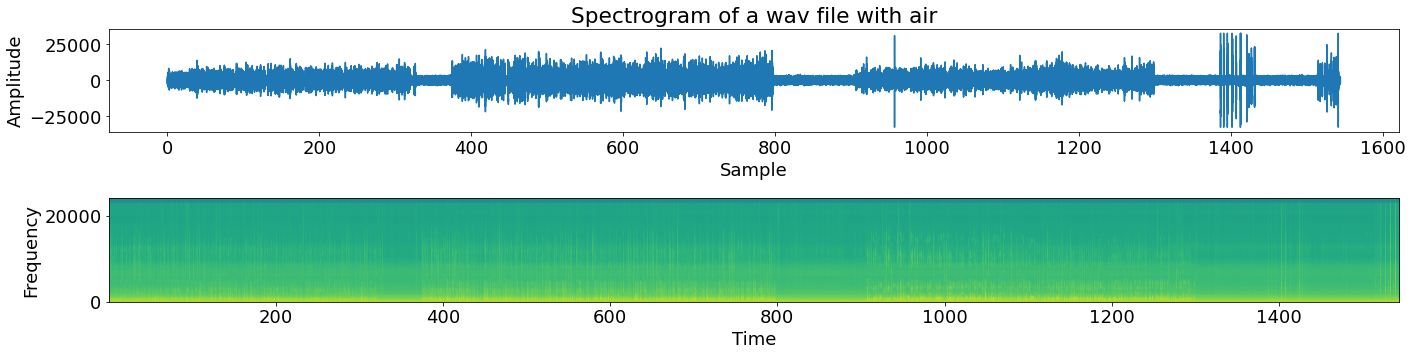

In [14]:
files = ["4-15-butanol_exp.wav"]

for i in range(len(files)):
    print (f"For {files[i]}: ")
    samplingFrequency, signalData, duration = wav_plot(files[i])


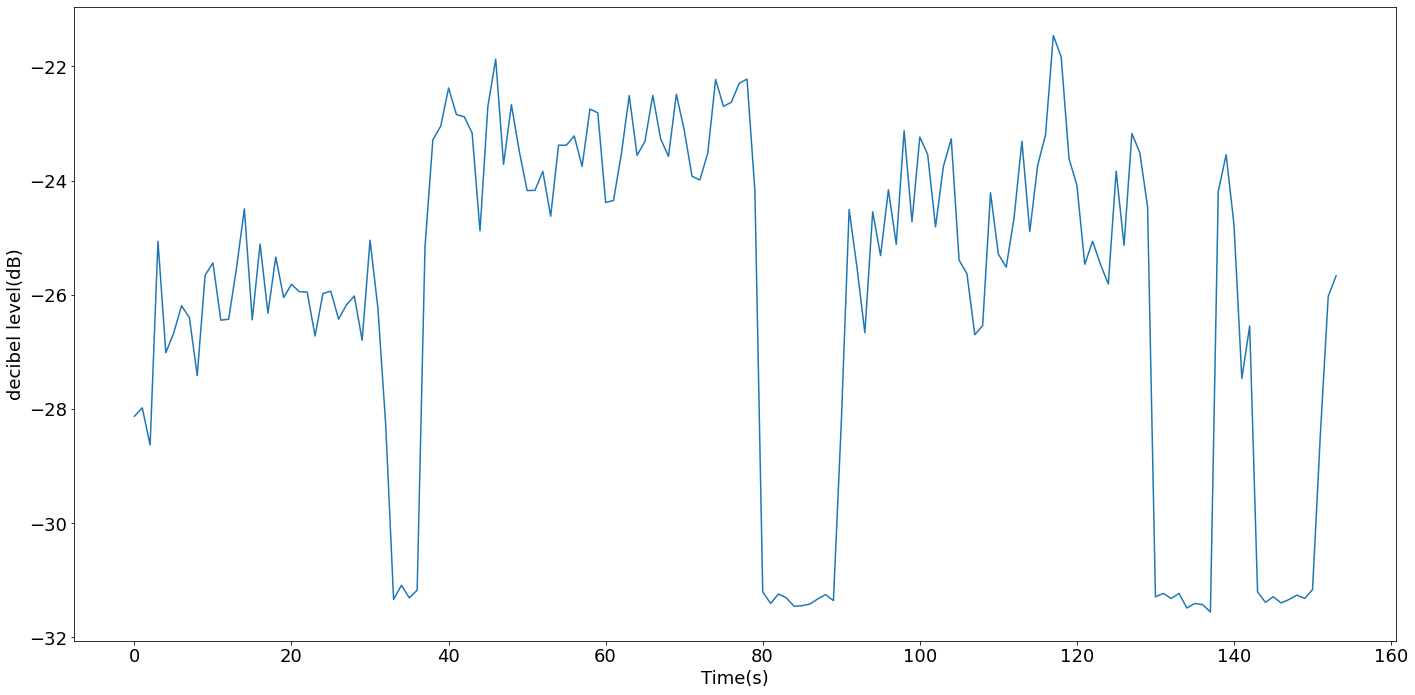

In [15]:
from scipy.io.wavfile import read
samprate, wavdata = read('4-15-butanol_exp.wav')
import numpy as np
import math
import statistics 
# import pyaudio
import time
from math import log10
import audioop  
import matplotlib.pyplot as plt

dbs = []
WIDTH = 2

chunks = np.array_split(wavdata, duration/10)
for chunk in chunks:
    rms = audioop.rms(chunk, WIDTH) / 32767
    db = 20 * math.log10(rms)
    dbs.append(db)
# print(dbs)
x = range(0,11600)
plt.figure(figsize=(20,10))

plt.plot(dbs)
plt.xlabel("Time(s)")
plt.ylabel("decibel level(dB)")
plt.savefig("audio_activities_415.png")